Laboratorio sobre random forest.

1. Generar el dataset
2. Implementar random forest
3. grid_search
4. make classification, make bloomb

In [6]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


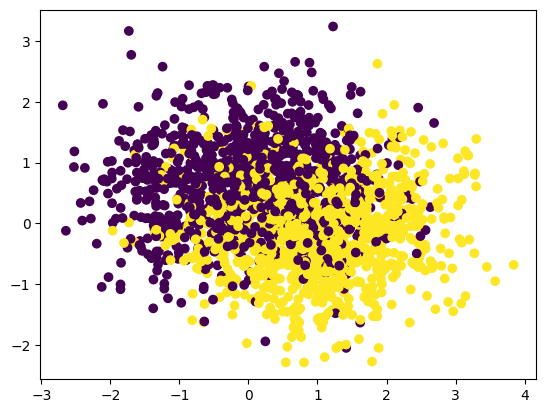

In [34]:
X, y = make_moons(n_samples=2000, noise=0.7, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

La precisión del clasificador es: 0.73
La matriz de confusión es:
[[143  54]
 [ 54 149]]


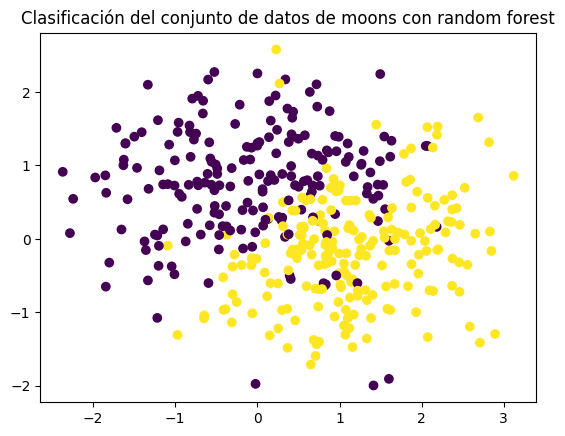

In [27]:
# Dividir el conjunto de datos en entrenamiento y prueba, usando un 80% para entrenamiento y un 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del clasificador RandomForestClassifier, usando 100 árboles y el criterio de entropía
clf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42)

# Entrenar el clasificador con los datos de entrenamiento
clf.fit(X_train, y_train)

# Predecir las etiquetas de las imágenes de prueba
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del clasificador con la precisión y la matriz de confusión
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"La precisión del clasificador es: {acc}")
print(f"La matriz de confusión es:\n{cm}")

# Visualizar las muestras de prueba y sus etiquetas predichas
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title("Clasificación del conjunto de datos de moons con random forest")
plt.show()

In [28]:
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
print(f"Los mejores parámetros son: {grid_search.best_params_}")
print(f"El mejor puntaje es: {grid_search.best_score_}")
print(f"El mejor estimador es: {grid_search.best_estimator_}")
print(f"Los resultados detallados son: {grid_search.cv_results_}")

Los mejores parámetros son: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 10}
El mejor puntaje es: 0.7581249999999999
El mejor estimador es: RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       random_state=0)
Los resultados detallados son: {'mean_fit_time': array([0.05041456, 0.16416597, 0.31736121, 0.60168376, 0.02389154,
       0.11601596, 0.22759371, 0.45590515, 0.02901545, 0.20626016,
       0.39351373, 0.52972145, 0.03018541, 0.14213276, 0.2788723 ,
       0.55677414, 0.03539472, 0.16479168, 0.48995209, 0.74038997,
       0.02731204, 0.12227263, 0.24023213, 0.48678122, 0.02986889,
       0.14704447, 0.29265952, 1.06730161, 0.03922944, 0.18121076,
       0.3471344 , 0.68453665]), 'std_fit_time': array([0.0065047 , 0.02990164, 0.05400335, 0.08493914, 0.00111722,
       0.00450997, 0.00592508, 0.01586298, 0.00233439, 0.02244513,
       0.0689885 , 0.00672142, 0.00136962, 0.00581471, 0.00982879,
       0.00670484, 0.00209771, 0.0

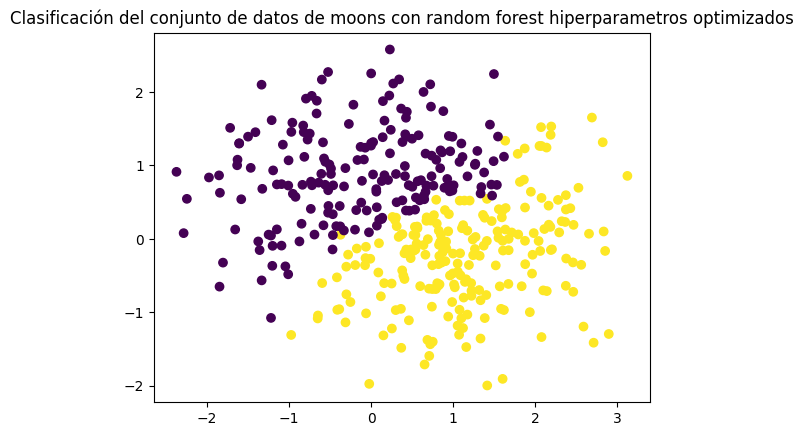

In [31]:
# Crear una instancia del clasificador RandomForestClassifier, usando 100 árboles y el criterio de entropía
clf1 = RandomForestClassifier(n_estimators=10, criterion="entropy", max_depth = 5, random_state=0)

# Entrenar el clasificador con los datos de entrenamiento
clf1.fit(X_train, y_train)

# Predecir las etiquetas de las imágenes de prueba
y_pred1 = clf1.predict(X_test)

# Visualizar las muestras de prueba y sus etiquetas predichas
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred1)
plt.title("Clasificación del conjunto de datos de moons con random forest hiperparametros optimizados")
plt.show()

In [46]:
y_pr = clf1.predict(X_train)


In [48]:
test_score1 = clf1.score(X_train, y_train)
print(test_score1)

0.793125


In [32]:
test_score = clf1.score(X_test, y_test)
print(test_score)

0.765


Cantidad de datos positivos y falsos negativos

In [42]:
falso_negativo = []
k = 0
for i in range(0, len(y_test)):
  if y_test[i] != y_pred1[i]:
    falso_negativo.append(k)
    k += 1


In [43]:
print(k)

94


In [45]:
400*0.765

306.0